# **Myntra Inventory Tracker and Analyzer**

## **Objective**

To analyze inventory data to identify trends in product demand, optimize restocking decisions, and track inventory turnover using advanced Python libraries.

## **1. Importing Libraries**

**Theory:**

To perform advanced data analysis, we utilize:
- `pandas` for efficient data manipulation.
- `matplotlib.pyplot` and `seaborn` for creating detailed visualizations.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **2. Loading the Dataset**

**Theory:**

Load the previously generated dataset and inspect its structure to understand the available data.

In [2]:
# Load the dataset
file_name = "myntra_inventory_data.csv"
df = pd.read_csv(file_name)

# Display the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

# Check basic information about the dataset
print("\nDataset Information:")
df.info()

Dataset Overview:
  Product ID Product Name         Category   Brand    Price  Stock Quantity  \
0  PROD00001    Product_1         Footwear     MAC  5500.34               9   
1  PROD00002    Product_2  Beauty Products     H&M  2222.68              20   
2  PROD00003    Product_3  Beauty Products    Zara  1401.28              17   
3  PROD00004    Product_4      Accessories    Nike  9130.28              76   
4  PROD00005    Product_5         Footwear  Adidas  3923.66              17   

   Units Sold Last Restocked Sales Month  
0          23     2023-08-14        June  
1          19     2023-07-19         May  
2          22     2023-07-14       April  
3          44     2023-12-09         May  
4          21     2023-09-16        June  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      1000 non-nu

## **3. Data Cleaning**

**Theory:**

Cleaning involves handling null values, ensuring consistent data types, and formatting columns for analysis.

In [3]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Convert 'Last Restocked' to datetime format
df['Last Restocked'] = pd.to_datetime(df['Last Restocked'])

# Check for negative stock or sales values
print("\nNegative Values Check:")
print(df[(df['Stock Quantity'] < 0) | (df['Units Sold'] < 0)])


Missing Values:
Product ID        0
Product Name      0
Category          0
Brand             0
Price             0
Stock Quantity    0
Units Sold        0
Last Restocked    0
Sales Month       0
dtype: int64

Negative Values Check:
Empty DataFrame
Columns: [Product ID, Product Name, Category, Brand, Price, Stock Quantity, Units Sold, Last Restocked, Sales Month]
Index: []


## **4. Exploratory Data Analysis (EDA)**

### **4.1 Sales by Category**

**Theory:**

Analyzing sales distribution across product categories helps identify which categories are most popular.

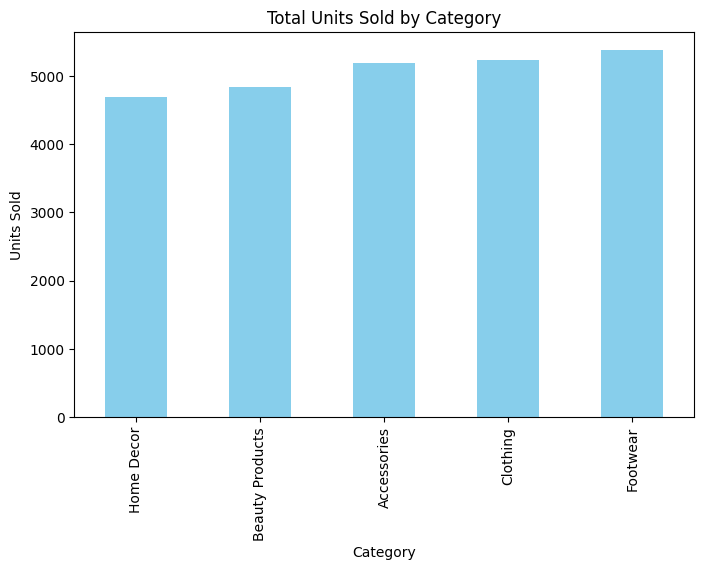

In [4]:
# Total units sold by category
sales_by_category = df.groupby('Category')['Units Sold'].sum()

# Plot the results
plt.figure(figsize=(8, 5))
sales_by_category.sort_values().plot(kind='bar', color='skyblue')
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()

### **4.2 Inventory Turnover Rate**

**Theory:**

Inventory turnover rate indicates how quickly products are sold and restocked.

Formula:
\[ \text{Turnover Rate} = \frac{\text{Units Sold}}{\text{Stock Quantity}} \]

<ipython-input-5-bab7d598b72d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Turnover Rate', y='Product ID', data=top_turnover, palette='coolwarm')


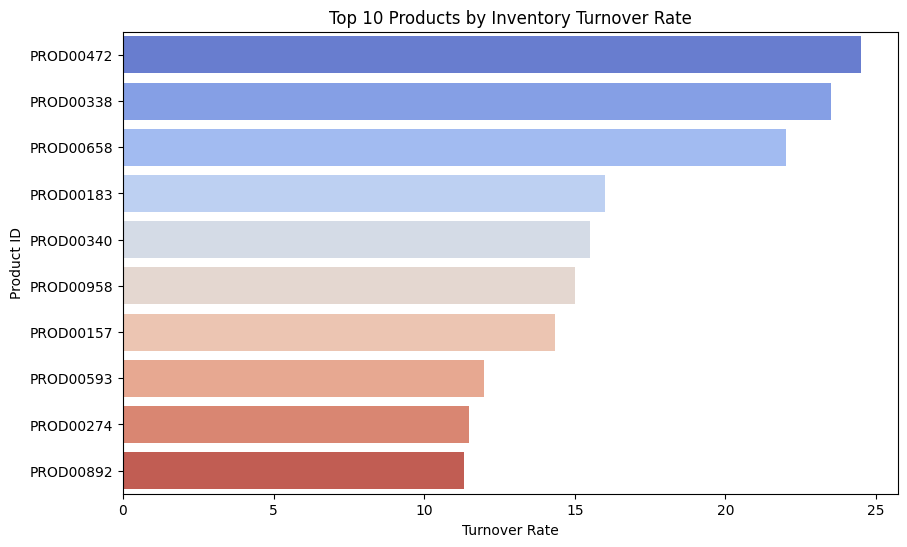

In [5]:
# Calculate inventory turnover rate
df['Turnover Rate'] = df['Units Sold'] / (df['Stock Quantity'] + 1)  # Avoid division by zero

# Plot turnover rates for top 10 products
top_turnover = df[['Product ID', 'Turnover Rate']].sort_values(by='Turnover Rate', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Turnover Rate', y='Product ID', data=top_turnover, palette='coolwarm')
plt.title('Top 10 Products by Inventory Turnover Rate')
plt.xlabel('Turnover Rate')
plt.ylabel('Product ID')
plt.show()

### **4.3 Price vs. Sales**

**Theory:**

Examining the relationship between price and sales helps in understanding price elasticity and setting optimal prices.

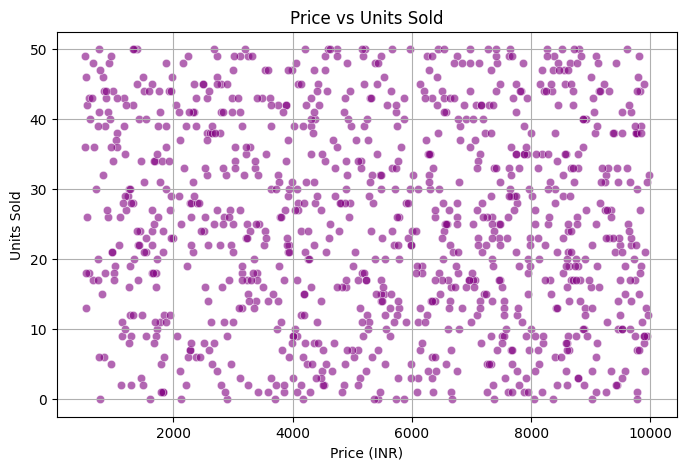

In [6]:
# Scatter plot of price vs units sold
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Price', y='Units Sold', data=df, alpha=0.6, color='purple')
plt.title('Price vs Units Sold')
plt.xlabel('Price (INR)')
plt.ylabel('Units Sold')
plt.grid()
plt.show()

### **4.4 Sales Trends by Month**

**Theory:**

Understanding monthly sales trends helps identify seasonality and plan promotions accordingly.

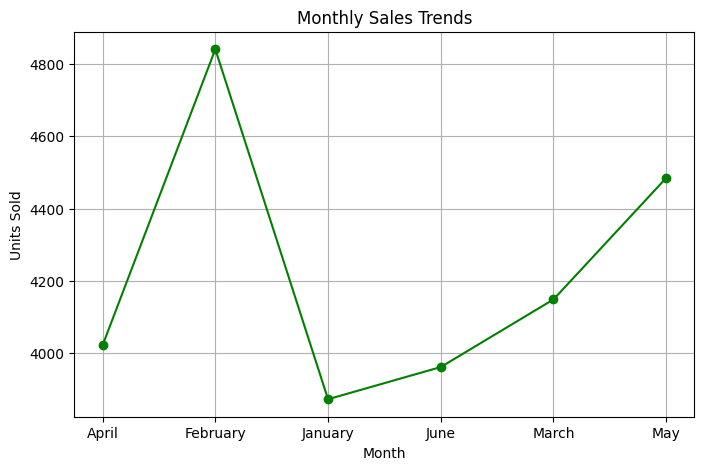

In [7]:
# Total sales by month
sales_by_month = df.groupby('Sales Month')['Units Sold'].sum()

# Plot monthly sales
plt.figure(figsize=(8, 5))
sales_by_month.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.grid()
plt.show()

## **5. Generating Insights**

**Theory:**

Key insights summarize the most critical findings to guide decisions.

In [8]:
# Key metrics
top_category = sales_by_category.idxmax()
highest_turnover_product = df.loc[df['Turnover Rate'].idxmax(), 'Product ID']
lowest_turnover_product = df.loc[df['Turnover Rate'].idxmin(), 'Product ID']

print(f"Top-Selling Category: {top_category}")
print(f"Product with Highest Turnover Rate: {highest_turnover_product}")
print(f"Product with Lowest Turnover Rate: {lowest_turnover_product}")

Top-Selling Category: Footwear
Product with Highest Turnover Rate: PROD00472
Product with Lowest Turnover Rate: PROD00058


## **6. Saving Processed Data**

**Theory:**

Save the dataset with additional calculated features like turnover rate for future analysis.

In [9]:
# Save the processed dataset
processed_file_name = "processed_myntra_inventory_data.csv"
df.to_csv(processed_file_name, index=False)
print(f"Processed data saved as {processed_file_name}")

Processed data saved as processed_myntra_inventory_data.csv
